<a href="https://colab.research.google.com/github/sharathchandra04/MLlearning/blob/main/classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tasks
--------------------------
1. mnist number classification using multiclass LDA.
2. perceptron
3. svm kernels
4. gda
5. gvm
6. nbc

perceptron classification example


In [ ]:
import numpy as np

# Build the Perceptron Model
class Perceptron:

    def __init__(self, num_inputs, learning_rate=0.01):
        print(type(num_inputs))
        # Initialize the weight and learning rate
        self.weights = np.random.rand(num_inputs + 1)
        self.learning_rate = learning_rate

    # Define the first linear layer
    def linear(self, inputs):
        Z = inputs @ self.weights[1:].T + + self.weights[0]
        return Z

    # Define the Heaviside Step function.
    def Heaviside_step_fn(self, z):
        if z >= 0:
            return 1
        else:
            return 0

    # Define the Prediction
    def predict(self, inputs):
        Z = self.linear(inputs)
        try:
            pred = []
            for z in Z:
                pred.append(self.Heaviside_step_fn(z))
        except:
            return self.Heaviside_step_fn(Z)
        return pred

    # Define the Loss function
    def loss(self, prediction, target):
        loss = (prediction-target)
        return loss

    #Define training
    def train(self, inputs, target):
        prediction = self.predict(inputs)
        # print('prediction -> ', prediction)
        error = self.loss(prediction, target)
        # ******************  imp  ****************
        # this is basically (inputs*error)/100 if learning rate is 0.01
        # this is basically (inputs*error)/1000 if learning rate is 0.001
        # to completely use the potential of the learning-rate which is 0.001 run the train algorithm 1000 times
        # ******************  imp  ****************
        self.weights[1:] += self.learning_rate * error * inputs
        self.weights[0]  += self.learning_rate * error

    # Fit the model
    def fit(self, X, y, num_epochs):
        for epoch in range(num_epochs):
            for inputs, target in zip(X, y):
                self.train(inputs, target)

import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Generate a linearly separable dataset with two classes
X, y = make_blobs(n_samples=1000,
                  n_features=2,
                  centers=2,
                  cluster_std=3,
                  random_state=23)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=23,
                                                    shuffle=True
                                                   )

# Scale the input features to have zero mean and unit variance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Set the random seed legacy
np.random.seed(23)

# Initialize the Perceptron with the appropriate number of inputs
print(X_train)
print('X_train.shape[1] --> ', X_train.shape[1])
perceptron = Perceptron(num_inputs=X_train.shape[1])

# Train the Perceptron on the training data
perceptron.fit(X_train, y_train, num_epochs=100)

# Prediction
pred = perceptron.predict(X_test)

# Test the accuracy of the trained Perceptron on the testing data
accuracy = np.mean(pred != y_test)
print("Accuracy:", accuracy)

# Plot the dataset
plt.scatter(X_test[:, 0], X_test[:, 1], c=pred)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


same using pyTorch


In [ ]:
#@title uuing pytorch
import torch
import torch.nn as nn
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Generate a linearly separable dataset with two classes
X, y = make_blobs(n_samples=1000,
                  n_features=2,
                  centers=2,
                  cluster_std=3,
                  random_state=23)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=23,
                                                    shuffle=True
                                                   )

# Scale the input features to have zero mean and unit variance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert the data to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32, requires_grad=False)
X_test = torch.tensor(X_test, dtype=torch.float32, requires_grad=False)
y_train = torch.tensor(y_train, dtype=torch.float32, requires_grad=False)
y_test = torch.tensor(y_test, dtype=torch.float32, requires_grad=False)

# reshape the target tensor to match the predicted output tensor
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

torch.random.seed()

# Define the Perceptron model
class Perceptron(nn.Module):
    def __init__(self, num_inputs):
        super(Perceptron, self).__init__()
        self.linear = nn.Linear(num_inputs, 1)

    # Heaviside Step function
    def heaviside_step_fn(self,Z):
        Class = []
        for z in Z:
            if z >= 0:
                Class.append(1)
            else:
                Class.append(0)
        return torch.tensor(Class)

    def forward(self, x):
        Z = self.linear(x)
        return self.heaviside_step_fn(Z)


# Initialize the Perceptron with the appropriate number of inputs
perceptron = Perceptron(num_inputs=X_train.shape[1])

# loss function
def loss(y_pred,Y):
    cost = y_pred-Y
    return cost


# Learning Rate
learning_rate = 0.001

# Train the Perceptron on the training data
num_epochs = 10
for epoch in range(num_epochs):
    Losses = 0
    for Input, Class in zip(X_train, y_train):
        # Forward pass
        predicted_class = perceptron(Input)
        error = loss(predicted_class, Class)
        Losses += error
        # Perceptron Learning Rule

        # Model Parameter
        w = perceptron.linear.weight
        b = perceptron.linear.bias

        # Matually Update the model parameter
        w = w - learning_rate * error * Input
        b = b - learning_rate * error

        # assign the weight & bias parameter to the linear layer
        perceptron.linear.weight = nn.Parameter(w)
        perceptron.linear.bias   = nn.Parameter(b)
    print('Epoch [{}/{}], weight:{}, bias:{} Loss: {:.4f}'.format(
        epoch+1,num_epochs,
        w.detach().numpy(),
        b.detach().numpy(),
        Losses.item()))

# Test the accuracy of the trained Perceptron on the testing data
pred = perceptron(X_test)

accuracy = (pred==y_test[:,0]).float().mean()
print("Accuracy on Test Dataset:", accuracy.item())

# Plot the dataset
plt.scatter(X_test[:, 0], X_test[:, 1], c=pred)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()



In [ ]:
#@title exp
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
import seaborn as sns

# sns.distplot(random.normal(size=1000), hist=False)

# plt.show()

class1_data = random.randn(100, 2)
# print(class1_data)
# np.random.randn(num_points, 2) * variance
# print(np.array([1,2,3])*3)

a= np.array([1,2,3])
b = np.array([[1,2], [4,5], [7,8]])
print(a)
print(b)
# print(a[:])
print(b[:, 1])
print(b[:, 0])
# print(b[-2:-1, 2])

print(np.shape(b[1]), np.shape(b[0]))

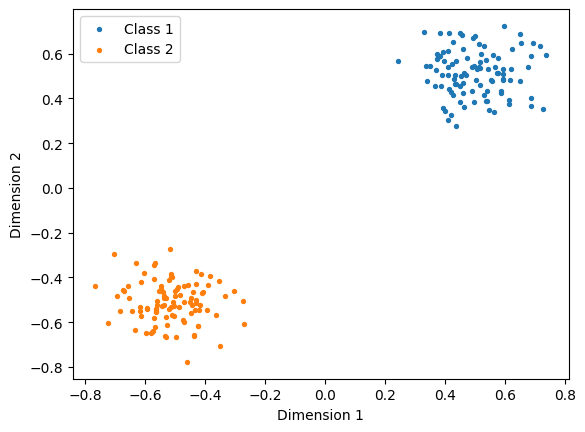

In [66]:
import numpy as np


# Set the random seed for reproducibility
np.random.seed(0)

# Number of data points per class
num_points = 100

# Mean and small variance for the Gaussian distribution
mean_class1 = np.array([0.5, 0.5])
mean_class2 = np.array([-0.5, -0.5])
variance = 0.1


# gaussian distribution with variance = 1 and std = 1 with center at [0,0]
gaussian_class1 = np.random.randn(num_points, 2)
gaussian_class2 = np.random.randn(num_points, 2)

# scaling to the variance scale
scaled_gaussian_class1 = gaussian_class1 * variance
scaled_gaussian_class2 = gaussian_class2 * variance

# shifting the means
class1_data = scaled_gaussian_class1 + mean_class1
class2_data = scaled_gaussian_class2 + mean_class2

# Visualize the data (optional)
import matplotlib.pyplot as plt

plt.scatter(class1_data[:, 0], class1_data[:, 1], s=8, label='Class 1')
plt.scatter(class2_data[:, 0], class2_data[:, 1], s=8, label='Class 2')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.show()


In [67]:
def perceptron_train(X, y, weights,  max_epochs=100, learning_rate=1):
    w = weights
    b = 0

    for epoch in range(max_epochs):
        errors = 0
        for i in range(X.shape[0]):
            # Perceptron update rule
            prediction = np.dot(w, X[i]) + b
            Z = None
            if prediction >=0:
              Z = 1
            else:
              Z = -1
            loss = Z - y[i]
            if y[i] * prediction <= 0:
                w += learning_rate * y[i] * X[i]
                b += learning_rate * y[i]
                errors += 1

        # If there were no errors, early stopping
        if errors == 0:
            print(f'Converged in {epoch+1} epochs.')
            break
    return w, b


X = np.concatenate((class1_data, class2_data))
y = np.concatenate((np.ones(num_points), -np.ones(num_points)))

# print(X)
# print(y)

weights = np.zeros(X.shape[1])

# Run the perceptron algorithm
weights, bias = perceptron_train(X, y, weights)
print(weights, bias)


Converged in 2 epochs.
[1.21332342 1.06395364] 0.0


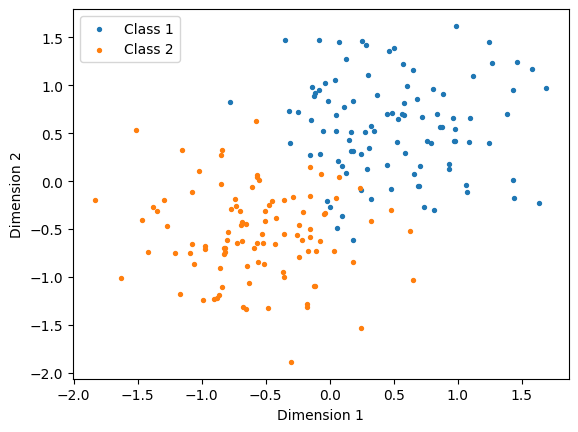

[1.30791689 2.02968913] -1.0
there is an error remaining in the weights didn't converge, there was an error in every epoch


In [68]:
new_variance = 0.5
scaled_gaussian_class1_set2 = gaussian_class1 * new_variance
scaled_gaussian_class2_set2 = gaussian_class2 * new_variance

# shifting the means
class1_data_set2 = scaled_gaussian_class1_set2 + mean_class1
class2_data_set2 = scaled_gaussian_class2_set2 + mean_class2

plt.scatter(class1_data_set2[:, 0], class1_data_set2[:, 1], s=8, label='Class 1')
plt.scatter(class2_data_set2[:, 0], class2_data_set2[:, 1], s=8, label='Class 2')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.show()

X_n = np.concatenate((class1_data_set2, class2_data_set2))
y_n = np.concatenate((np.ones(num_points), -np.ones(num_points)))

weights = np.zeros(X_n.shape[1])

# Run the perceptron algorithm
weights, bias = perceptron_train(X_n, y_n, weights)
print(weights, bias)
print("there is an error remaining in the weights didn't converge, there was an error in every epoch")
